## Import Keras and Packages



In [1]:
#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6
#!pip install matplotlib==3.5.0

In [2]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt



---


The Keras library includes the MNIST dataset as part of its API


---



In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step




---


confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.

---




In [4]:
X_train.shape

(60000, 28, 28)




---


The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.


---



---


visualize the first image in the training set using Matplotlib's scripting layer.


---



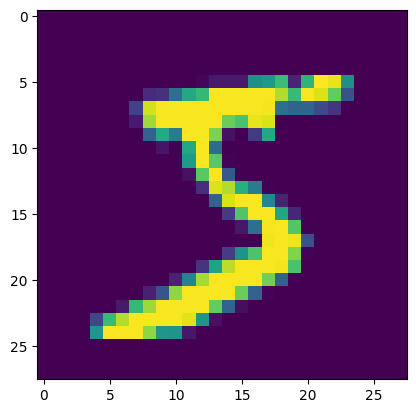

In [6]:
plt.imshow(X_train[0])




---


ith conventional neural networks, it is not possible to feed in the image as input as is. So the next step is to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.


---



In [8]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images



---


Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.


---



In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255



---


for classification the target variable needs to be divided into categories. The to_categorical function from the Keras Utilities package will do this.


---



In [10]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network


In [11]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the Network


In [12]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 - 25s - 13ms/step - accuracy: 0.9431 - loss: 0.1870 - val_accuracy: 0.9642 - val_loss: 0.1162
Epoch 2/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9757 - loss: 0.0781 - val_accuracy: 0.9763 - val_loss: 0.0778
Epoch 3/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9831 - loss: 0.0538 - val_accuracy: 0.9755 - val_loss: 0.0812
Epoch 4/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9872 - loss: 0.0397 - val_accuracy: 0.9738 - val_loss: 0.0827
Epoch 5/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9900 - loss: 0.0318 - val_accuracy: 0.9794 - val_loss: 0.0750
Epoch 6/10
1875/1875 - 40s - 22ms/step - accuracy: 0.9911 - loss: 0.0272 - val_accuracy: 0.9797 - val_loss: 0.0862
Epoch 7/10
1875/1875 - 40s - 22ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9800 - val_loss: 0.0869
Epoch 8/10
1875/1875 - 42s - 22ms/step - accuracy: 0.9937 - loss: 0.0202 - val_accuracy: 0.9816 - val_loss: 0.0749
Epoch 9/10
1875/1875 - 41s - 22ms/step - accuracy: 0.9946 - loss: 0.0165 - val_a



---


print the accuracy and the corresponding error.



---





Epoch 1/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9954 - loss: 0.0136 - val_accuracy: 0.9803 - val_loss: 0.0924
Epoch 2/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.9813 - val_loss: 0.1041
Epoch 3/10
1875/1875 - 40s - 21ms/step - accuracy: 0.9962 - loss: 0.0124 - val_accuracy: 0.9803 - val_loss: 0.0997
Epoch 4/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 0.9769 - val_loss: 0.1291
Epoch 5/10
1875/1875 - 20s - 10ms/step - accuracy: 0.9970 - loss: 0.0087 - val_accuracy: 0.9822 - val_loss: 0.1080
Epoch 6/10
1875/1875 - 22s - 12ms/step - accuracy: 0.9969 - loss: 0.0122 - val_accuracy: 0.9797 - val_loss: 0.1437
Epoch 7/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9968 - loss: 0.0122 - val_accuracy: 0.9814 - val_loss: 0.1097
Epoch 8/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9977 - loss: 0.0083 - val_accuracy: 0.9724 - val_loss: 0.1701
Epoch 9/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9973 - loss: 0.0104 - val_a

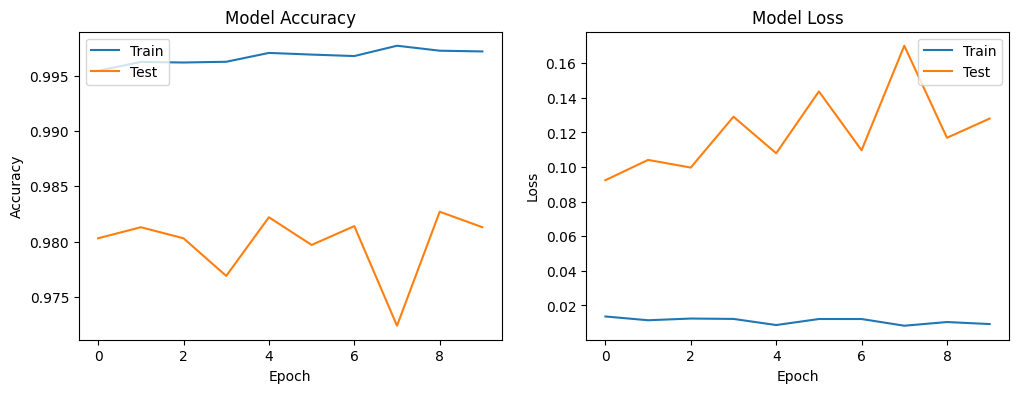

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

In [13]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9775000214576721% 
 Error: 0.02249997854232788




---


Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training.


---



In [14]:
model.save('classification_model.h5')



---


Since our model contains multidimensional arrays of data, then models are usually saved as .h5 files.

When you are ready to use your model again, you use the load_model function from <strong>keras.models</strong>.


---




In [15]:
from keras.models import load_model

In [16]:
pretrained_model = load_model('classification_model.h5')

In [17]:
import numpy as np

# Assume new_image is a single 28x28 numpy array of a digit
# You would load and preprocess this image similarly to the training data
# Example: Reshape and normalize a placeholder array
new_image = np.random.randint(0, 256, size=(28, 28), dtype=np.uint8)
new_image_flattened = new_image.reshape(1, num_pixels).astype('float32') / 255

# Predict the class probabilities
predictions = model.predict(new_image_flattened)

# Get the predicted class (the one with the highest probability)
predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted class: 5


Image loaded successfully from /content/Picture4.png


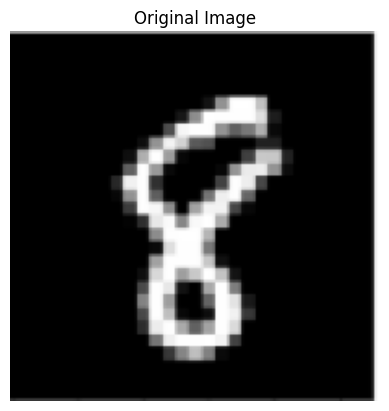

Image converted to grayscale.
Image resized to 28x28.


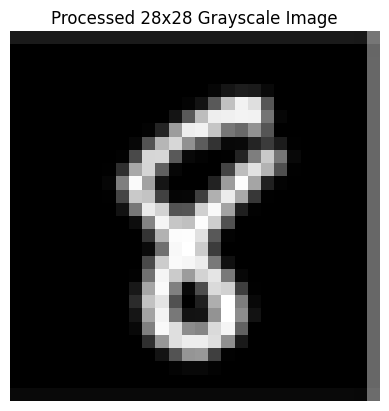

Processed image shape: (1, 784)
Image ready for prediction (although prediction with MNIST model on this image will not be accurate).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class (using MNIST model): 8


In [31]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image_path = '/content/Picture4.png'
try:
    # Load the image
    img = Image.open(image_path)
    print(f"Image loaded successfully from {image_path}")

    # Display the original image
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Convert to grayscale
    img_gray = img.convert('L')
    print("Image converted to grayscale.")

    # Resize to 28x28 (required by the MNIST model input shape)
    img_resized = img_gray.resize((28, 28))
    print("Image resized to 28x28.")

    # Convert image to numpy array
    img_array = np.array(img_resized)

    # Display the processed image (optional)
    plt.imshow(img_array, cmap='gray')
    plt.title("Processed 28x28 Grayscale Image")
    plt.axis('off')
    plt.show()

    # Flatten the image into a 1D vector (1x784)
    img_flattened = img_array.reshape(1, -1).astype('float32')

    # Normalize pixel values to be between 0 and 1
    img_normalized = img_flattened / 255.0

    print(f"Processed image shape: {img_normalized.shape}")
    print("Image ready for prediction (although prediction with MNIST model on this image will not be accurate).")

    # --- Next Step: Use the pre-trained model for prediction (with the understanding it's not suitable for this image type) ---
    # Assuming 'pretrained_model' is loaded from the previous cell
    if 'pretrained_model' in globals():
        # Predict the class probabilities
        predictions = pretrained_model.predict(img_normalized)

        # Get the predicted class
        predicted_class = np.argmax(predictions, axis=1)

        print(f"Predicted class (using MNIST model): {predicted_class[0]}")
    else:
        print("Pre-trained model not found. Please ensure the cell that loads the model is run.")


except FileNotFoundError:
    print(f"Error: The file was not found at {image_path}. Please ensure the file exists.")
except Exception as e:
    print(f"An error occurred during image processing: {e}")


Epoch 1/20
1875/1875 - 19s - 10ms/step - accuracy: 0.9972 - loss: 0.0117 - val_accuracy: 0.9829 - val_loss: 0.1210
Epoch 2/20
1875/1875 - 21s - 11ms/step - accuracy: 0.9980 - loss: 0.0082 - val_accuracy: 0.9819 - val_loss: 0.1315
Epoch 3/20
1875/1875 - 18s - 10ms/step - accuracy: 0.9978 - loss: 0.0094 - val_accuracy: 0.9817 - val_loss: 0.1299
Epoch 4/20
1875/1875 - 22s - 12ms/step - accuracy: 0.9974 - loss: 0.0094 - val_accuracy: 0.9813 - val_loss: 0.1434
Epoch 5/20
1875/1875 - 19s - 10ms/step - accuracy: 0.9976 - loss: 0.0083 - val_accuracy: 0.9827 - val_loss: 0.1351
Epoch 6/20
1875/1875 - 22s - 12ms/step - accuracy: 0.9984 - loss: 0.0058 - val_accuracy: 0.9815 - val_loss: 0.1240
Epoch 7/20
1875/1875 - 20s - 11ms/step - accuracy: 0.9975 - loss: 0.0093 - val_accuracy: 0.9820 - val_loss: 0.1376
Epoch 8/20
1875/1875 - 18s - 10ms/step - accuracy: 0.9983 - loss: 0.0065 - val_accuracy: 0.9828 - val_loss: 0.1587
Epoch 9/20
1875/1875 - 22s - 11ms/step - accuracy: 0.9977 - loss: 0.0100 - val_a

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 - 20s - 11ms/step - accuracy: 0.9435 - loss: 0.1852 - val_accuracy: 0.9734 - val_loss: 0.0873
Epoch 2/20
1875/1875 - 22s - 12ms/step - accuracy: 0.9760 - loss: 0.0757 - val_accuracy: 0.9748 - val_loss: 0.0780
Epoch 3/20
1875/1875 - 19s - 10ms/step - accuracy: 0.9827 - loss: 0.0536 - val_accuracy: 0.9782 - val_loss: 0.0709
Epoch 4/20
1875/1875 - 21s - 11ms/step - accuracy: 0.9874 - loss: 0.0390 - val_accuracy: 0.9796 - val_loss: 0.0764
Epoch 5/20
1875/1875 - 18s - 10ms/step - accuracy: 0.9893 - loss: 0.0334 - val_accuracy: 0.9739 - val_loss: 0.0891
Epoch 6/20
1875/1875 - 19s - 10ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.9786 - val_loss: 0.0827
Epoch 7/20
1875/1875 - 18s - 10ms/step - accuracy: 0.9934 - loss: 0.0198 - val_accuracy: 0.9797 - val_loss: 0.0897
Epoch 8/20
1875/1875 - 20s - 11ms/step - accuracy: 0.9931 - loss: 0.0210 - val_accuracy: 0.9808 - val_loss: 0.0770
Epoch 9/20
1875/1875 - 19s - 10ms/step - accuracy: 0.9944 - loss: 0.0173 - val_a

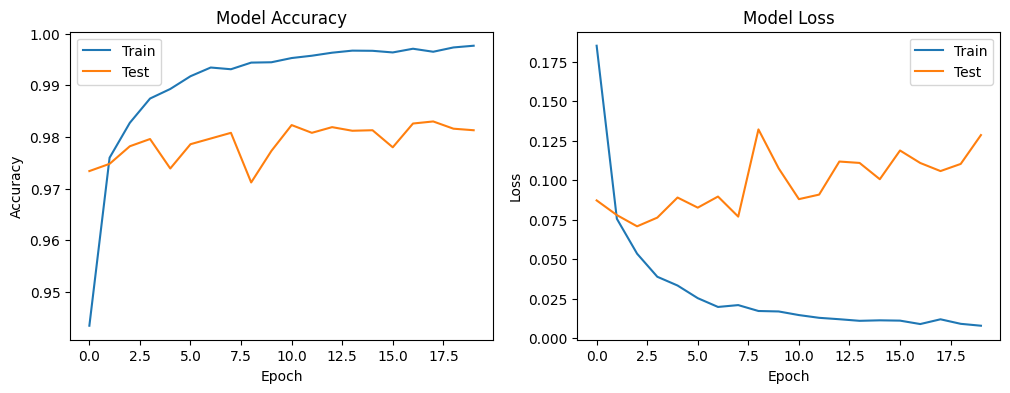

Accuracy: 0.9812999963760376% 
 Error: 0.018700003623962402


In [32]:
# Improve accuracy: Increase epochs and potentially add more layers
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=2)

# Re-evaluate the model after additional training
scores = model.evaluate(X_test, y_test, verbose=0)

# Fit the model for the desired total number of epochs to get a history object for the full run
model = classification_model() # Re-initialize the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=2)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

# Evaluate the model after the full training and print scores
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Image loaded successfully from /content/Picture4.png


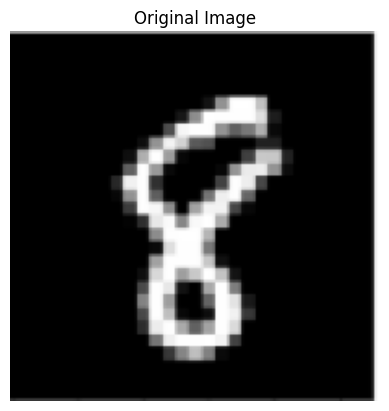

Image converted to grayscale.
Image resized to 28x28.


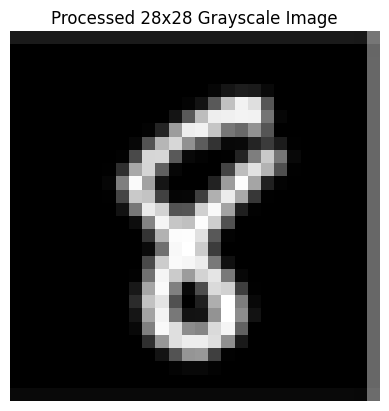

Processed image shape: (1, 784)
Image ready for prediction (although prediction with MNIST model on this image will not be accurate).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class (using MNIST model): 8


In [33]:
image_path = '/content/Picture4.png'
try:
    # Load the image
    img = Image.open(image_path)
    print(f"Image loaded successfully from {image_path}")

    # Display the original image
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Convert to grayscale
    img_gray = img.convert('L')
    print("Image converted to grayscale.")

    # Resize to 28x28 (required by the MNIST model input shape)
    img_resized = img_gray.resize((28, 28))
    print("Image resized to 28x28.")

    # Convert image to numpy array
    img_array = np.array(img_resized)

    # Display the processed image (optional)
    plt.imshow(img_array, cmap='gray')
    plt.title("Processed 28x28 Grayscale Image")
    plt.axis('off')
    plt.show()

    # Flatten the image into a 1D vector (1x784)
    img_flattened = img_array.reshape(1, -1).astype('float32')

    # Normalize pixel values to be between 0 and 1
    img_normalized = img_flattened / 255.0

    print(f"Processed image shape: {img_normalized.shape}")
    print("Image ready for prediction (although prediction with MNIST model on this image will not be accurate).")

    # --- Next Step: Use the pre-trained model for prediction (with the understanding it's not suitable for this image type) ---
    # Assuming 'pretrained_model' is loaded from the previous cell
    if 'pretrained_model' in globals():
        # Predict the class probabilities
        predictions = pretrained_model.predict(img_normalized)

        # Get the predicted class
        predicted_class = np.argmax(predictions, axis=1)

        print(f"Predicted class (using MNIST model): {predicted_class[0]}")
    else:
        print("Pre-trained model not found. Please ensure the cell that loads the model is run.")


except FileNotFoundError:
    print(f"Error: The file was not found at {image_path}. Please ensure the file exists.")
except Exception as e:
    print(f"An error occurred during image processing: {e}")


In [36]:
keras.saving.save_model(model, 'classification_model.keras')